In [17]:
import time
import matplotlib.pyplot as plt
import random
import math
import timeit
import string

1.1: The brute-force pattern-matching algorithm

Pattern substring should be at the end of text such that the Brute Force Pattern Matching could take omega(dp) time.
Algorithm will make *p* comparisons for *d-p+1* times, if the pattern substring of length *p* is at the end of the text *D* of length *d*, such that the time complexity would be O(dp)

Let, the Length of D is d and the Length of P is p.

Number of comparisons is  p*(d-p+1) and the time complexity is O(dp)

In [26]:
# Brute force
def find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    for i in range(n-m+1):
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            return i
    return -1

In [34]:
D = "BBBBBBBBBBBBBBBBBBBBD"
P = "BBBBBBBD"

print("substring starting point ",find_brute(D,P))
start_time = time.time()
index = find_brute(D, P)
end_time = time.time()
print("Brute force takes upto {:f}seconds to run and returns {:d}".format(end_time-start_time, index))


D = "ABCDEFGHIJKLEMNOPQ"
P = "Q"

print("substring starts at ",find_brute(D,P))
start_time = time.time()
index = find_brute(D, P)
end_time = time.time()
print("Brute force takes upto {:f}seconds to run and returns {:d}".format(end_time-start_time, index))

substring starting point  13
Brute force takes upto 0.000177seconds to run and returns 13
substring starts at  17
Brute force takes upto 0.000101seconds to run and returns 17


1.2: Python’s str class and pattern-matching

In [27]:
# Brute force
def find_brute_pattern(T, P):
    n, m = len(T), len(P)
    c = 0
    # every starting position
    # for i in range(n-m+1):
    i = 0
    while i<(n-m+1):
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            c+=1
            i+=m
        else:
            i+=1
    return c

Sample = "This is a test string, counting substring string and string a This counting"
Sample1 = "srtrtrtsrt"
Sample3 = "abababa"
Pattern1 = "string"
Pattern2 = "counting"
Pattern3 = "rtr"
Pattern4 = "aba"

print(f"Occurence of' {Pattern1} ' in text - ' {Sample} ' with Brute Force {find_brute_pattern(Sample,Pattern1)}")
print(f"Occurence of' {Pattern2} ' in text - ' {Sample} '  with Brute Force {find_brute_pattern(Sample,Pattern2)}")
print(f"Occurence of' {Pattern3} ' in text - ' {Sample1} '  with Brute Force {find_brute_pattern(Sample1,Pattern3)}")

print(f"Occurence of' {Pattern4} ' in text - ' {Sample3} ' with Brute Force {find_brute_pattern(Sample3,Pattern4)}")

Occurence of' string ' in text - ' This is a test string, counting substring string and string a This counting ' with Brute Force 4
Occurence of' counting ' in text - ' This is a test string, counting substring string and string a This counting '  with Brute Force 2
Occurence of' rtr ' in text - ' srtrtrtsrt '  with Brute Force 1
Occurence of' aba ' in text - ' abababa ' with Brute Force 2


In [28]:
#Boyer_more
def find_boyer_more(T, P):
    
    n, m = len(T), len(P)
    match = []
    
    if m == 0:
        return 0
    last = {}
    
    for k in range(m):
        last[P[k]] = k
        
    i = m - 1
    k = m - 1
    while i < n:
        
        if T[i] == P[k]:
            if k == 0:
                match.append(T[i:i+m])
                i = i + (m - 1) * 2
                k = m - 1
            else:
                i -= 1
                k -= 1
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m - 1
    if match:
        return match
    return -1

In [29]:
T = "ababababadcdacaababadcaababajfd;lasjdfababakd;fj;abab"
P = "abab"

print(find_boyer_more(T, P))

['abab', 'abab', 'abab', 'abab', 'abab', 'abab']


In [30]:
#kmp
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else: 
            j += 1
    return fail

In [31]:
# KMP
def find_kmp_pattern(T, P):
    c=0
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                c+=1

                j+=1
                continue
                # return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return c

Sample = "This is a test string, counting substring string and string a This counting"
Sample1 = "srtrtrtsrt"
Sample3 = "abababa"
Pattern1 = "string"
Pattern2 = "counting"
Pattern3 = "rtr"
Pattern4 = "aba"

print(f"Occurence of ' {Pattern1} ' in text - ' {Sample} ' with kmp {find_kmp_pattern(Sample,Pattern1)}")
print(f"Occurence of ' {Pattern2} ' in text - ' {Sample} ' with kmp {find_kmp_pattern(Sample,Pattern2)}")
print(f"Occurence of ' {Pattern3} ' in text - ' {Sample1} '  with kmp {find_kmp_pattern(Sample1,Pattern3)}")
print(f"Occurence of ' {Pattern4} ' in text - ' {Sample3} '  with kmp {find_kmp_pattern(Sample3,Pattern4)}")

Occurence of ' string ' in text - ' This is a test string, counting substring string and string a This counting ' with kmp 4
Occurence of ' counting ' in text - ' This is a test string, counting substring string and string a This counting ' with kmp 2
Occurence of ' rtr ' in text - ' srtrtrtsrt '  with kmp 1
Occurence of ' aba ' in text - ' abababa '  with kmp 2


2. Experimental Analysis of Pattern-Matching Algorithms

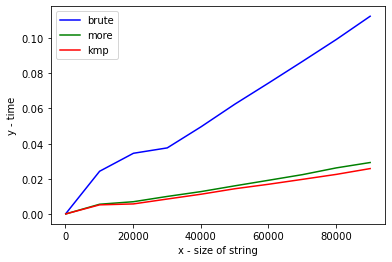

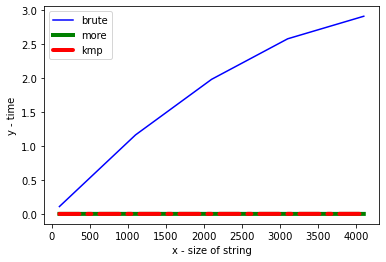

In [25]:
def time_functions(dic, s, p):
    
    times = []
    for fun in dic.values():
        start = timeit.default_timer()
        fun(s, p)
        end = timeit.default_timer()
        times.append([end-start, len(s), len(p)])
    return times

def compare_algorithms():
    
    dic = {
        "find_brute" : find_brute,
        "find_boyer_more" : find_boyer_more,
        "find_kmp" : find_kmp_pattern
    }

        
    total_times = []
    for i in range(100, 100000, 10000):
        s = "a" * i + "b"
        p = "a" * 10 + "b"
        total_times.append(time_functions(dic, s, p))

    brutex = []
    brutey = []
    morex = []
    morey = []
    kmpx = []
    kmpy = []
    for l in total_times:
        brutex.append(l[0][1])
        brutey.append(l[0][0])
        
        morex.append(l[1][1])
        morey.append(l[1][0])
        
        kmpx.append(l[2][1])
        kmpy.append(l[2][0])
    
    plt.plot(brutex, brutey, label="brute", color="blue")
    plt.plot(morex, morey, label="more", color="green")
    plt.plot(kmpx, kmpy, label="kmp", color="red")
    
    plt.xlabel("x - size of string")
    plt.ylabel("y - time")
    
    plt.legend()
    
    plt.show()
    
    total_times = []
    for i in range(100, 5000, 1000):
        s = "a" * 10000 + "b"
        p = "a" * i + "b"
        total_times.append(time_functions(dic, s, p))

    brutex = []
    brutey = []
    morex = []
    morey = []
    kmpx = []
    kmpy = []
    for l in total_times:
        brutex.append(l[0][2])
        brutey.append(l[0][0])
        
        morex.append(l[1][2])
        morey.append(l[1][0])
        
        kmpx.append(l[2][2])
        kmpy.append(l[2][0])
        
    plt.plot(brutex, brutey, label="brute", color="blue")
    plt.plot(morex, morey, label="more", color="green", linewidth=4)
    plt.plot(kmpx, kmpy, label="kmp", color="red", linewidth=4, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
    
    plt.xlabel("x - size of string")
    plt.ylabel("y - time")
    
    plt.legend()
    
    plt.show()
    
compare_algorithms()

3: Matrix-chain Multiplication

3.1 The Brute-Force

In [50]:
def brute_force(list_capacity,start,end):
    array_size = [list_capacity[0][0],list_capacity[0][1]]
    for item in range(1,len(list_capacity)):
        array_size.append(list_capacity[item][1])
    minimum_multiplication = math.inf
    
    if start == end:
        return 0
    else:
        for par_position in range(start,end):
            num_of_multiplication = brute_force(list_capacity,start,par_position) + brute_force(list_capacity,par_position+1,end) + (array_size[start-1]*array_size[par_position]*array_size[end])
            
            minimum_multiplication = num_of_multiplication if num_of_multiplication < minimum_multiplication else minimum_multiplication
    return minimum_multiplication

In [51]:
size_lists = [[(1,2),(5,6),(2,1),(3,4)],[(20,15),(15,10),(30,5),(25,5),(5,10),(15,35)],[(5, 6),(7, 8),(9, 10)]]
for list_capacity in size_lists:
    print("Minimum number of multiplications for the array of sizes ",list_capacity, "is", brute_force(list_capacity,1,len(list_capacity)))

Minimum number of multiplications for the array of sizes  [(1, 2), (5, 6), (2, 1), (3, 4)] is 18
Minimum number of multiplications for the array of sizes  [(20, 15), (15, 10), (30, 5), (25, 5), (5, 10), (15, 35)] is 7750
Minimum number of multiplications for the array of sizes  [(5, 6), (7, 8), (9, 10)] is 640


3.2: Bottom-up Dynamic Programming

In [62]:
def bottom_up(array_size):
    length = len(array_size)-1
    a = [[0] * (length+1) for i in range(length+1)]
    b = [[0] * (length) for i in range(length)]
    
    for item in range(1,length+1):
        a[item][item] = 0
    
    for l in range(2,length+1):
        for i in range(1,length-l+2):
            j = i+l-1
            a[i][j] = math.inf
            for k in range(i,j):
                flag = a[i][k]+a[k+1][j]+(array_size[i-1]*array_size[k]*array_size[j])
                
                if flag < a[i][j]:
                    a[i][j] = flag
                    b[i-1][j-1] = k
                    
    return a[1][length],parenthesis(b,1,length)

def parenthesis(b, i, j):
    path = ""
    if i == j:
        path += "A"+str(i)
    else:
        path += "("
        path += parenthesis(b, i, b[i-1][j-1])
        path += parenthesis(b, b[i-1][j-1] + 1, j)
        path += ")"
        
    return path

In [63]:
array_list = [[1,2,3,4,5],[10,20,30,15,5,25,35],[4, 3, 2, 1]]

for array_size in array_list:
    a,b = bottom_up(array_size)
    print("Minimum number of multiplications of the array ",array_size, "is", a)
    print("Parenthesis position of the minimum number of multiplications of the array", b)

Minimum number of multiplications of the array  [1, 2, 3, 4, 5] is 38
Parenthesis position of the minimum number of multiplications of the array (((A1A2)A3)A4)
Minimum number of multiplications of the array  [10, 20, 30, 15, 5, 25, 35] is 12375
Parenthesis position of the minimum number of multiplications of the array ((A1(A2(A3A4)))(A5A6))
Minimum number of multiplications of the array  [4, 3, 2, 1] is 18
Parenthesis position of the minimum number of multiplications of the array (A1(A2A3))


3.3: Dynamic Programming with Memoization

In [68]:
import sys

def parenthesize(s, start_index, end_index):
    
    if start_index == end_index:
        print('D' + str(start_index), end='')
        return

    k = s[start_index][end_index]

    print('(', end='')
    parenthesize(s, start_index, k)
    parenthesize(s, k + 1, end_index)
    print(')', end='')

    return

def matrix_chain_memoization(P):
    length = len(P)
    m = [[-1]*length for _ in range(length)]
    s = [[-1]*length for _ in range(length)]
 
    memoize(P, 1, length-1, m, s)
 
    return m, s

def memoize(P, start_index, end_index, m, s):
    if start_index >= end_index: #base case
        return 0

    result = sys.maxsize 

    for k in range(start_index, end_index):
        if m[start_index][k] != -1:
            res1 = m[start_index][k]
        else:
            res1 = memoize(P, start_index, k, m, s)
            m[start_index][k] = res1

        if m[k+1][end_index] != -1:
            res2 = m[k+1][end_index]
        else:
            res2 = memoize(P, k + 1, end_index, m, s)
            m[k+1][end_index] = res2

        res3 = P[start_index-1]*P[k]*P[end_index]
        
        cost = res1+res2+res3

        if result > cost:
            result = cost
            s[start_index][end_index] = k
 
    m[start_index][end_index] = result
    return result
 
n = int(input('Number of matrices: '))

P = []

for i in range(n+1):
    p = int(input('Dimensions of matrices:'))
    P.append(p)

print('Number of matrices is: ' + str(n))
print('Dimension array is: ')
print(P)

result = matrix_chain_memoization(P)

m = result[0]
s = result[1]

print('Optimized parentheses for matrices: ')
parenthesize(s, 1, n)

Number of matrices: 5
Dimensions of matrices:20
Dimensions of matrices:10
Dimensions of matrices:5
Dimensions of matrices:4
Dimensions of matrices:3
Dimensions of matrices:30
Number of matrices is: 5
Dimension array is: 
[20, 10, 5, 4, 3, 30]
Optimized parentheses for matrices: 
((D1(D2(D3D4)))D5)

4: Longest Common Sub-sequence (LCS) Problem

In [32]:
def longestCommonSubsequence(Sequence1, Sequnce2, len1, len2):
    Table = [[0 for item in range(len2+1)] for item in range(len1+1)]
  
    for i in range(len1+1):
        for j in range(len2+1):
            if i == 0 or j == 0:
                Table[i][j] = 0
            elif Sequence1[i-1] == Sequence2[j-1]:
                Table[i][j] = Table[i-1][j-1] + 1
            else:
                Table[i][j] = max(Table[i-1][j], Table[i][j-1])
                
    index = Table[len1][len2]
  
    longestCommonSubsequence = [""] * (index+1)
    longestCommonSubsequence[index] = ""
  
    pointer1 = len1
    pointer2 = len2
    while pointer1 > 0 and pointer2 > 0:
  
        if Sequence1[pointer1-1] == Sequence2[pointer2-1]:
            longestCommonSubsequence[index-1] = Sequence1[pointer1-1]
            pointer1-=1
            pointer2-=1
            index-=1
  
        elif Table[pointer1-1][pointer2] > Table[pointer1][pointer2-1]:
            pointer1-=1
        else:
            pointer2-=1
    
    commonsequence =""
    for index in longestCommonSubsequence:
        commonsequence = commonsequence + ""+index
    return commonsequence, Table[len1][len2]
  
Sequence1 = "MTQLQISLLLTATISLLHLVVATPYEAYPIGKQYPPVARVNESFTFQISNDTYKSSVDKTAQITYNCFDLPSWLSFDSSSRTFSGEPSSDLLSDANTTLYFNVILEGTDSADSTSLNNTYQFVVTNRPSISLSSDFNLLALLKNYGYTNGKNALKLDPNEVFNVTFDRSMFTNEESIVSYYGRSQLYNAPLPNWLFFDSGELKFTGTAPVINSAIAPETSYSFVIIATDIEGFSAVEVEFELVIGAHQLTTSIQNSLIINVTDTGNVSYDLPLNYVYLDDDPISSDKLGSINLLDAPDWVALDNATISGSVPDELLGKNSNPANFSVSIYDTYGDVIYFNFEVVSTTDLFAISSLPNINATRGEWFSYYFLPSQFTDYVNTNVSLEFTNSSQDHDWVKFQSSNLTLAGEVPKNFDKLSLGLKANQGSQSQELYFNIIGMDSKITHSNHSANATSTRSSHHSTSTSSYTSSTYTAKISSTSAAATSSAPAALPAANKTSSHNKKAVAIACGVAIPLGVILVALICFLIFWRRRRENPDDENLPHAISGPDLNNPANKPNQENATPLNNPFDDDASSYDDTSIARRLAALNTLKLDNHSATESDISSVDEKRDSLSGMNTYNDQFQSQSKEELLAKPPVQPPESPFFDPQNRSSSVYMDSEPAVNKSWRYTGNLSPVSDIVRDSYGSQKTVDTEKLFDLEAPEKEKRTSRDVTMSSLDPWNSNISPSPVRKSVTPSPYNVTKHRNRHLQNIQDSQSGKNGITPTTMSTSSSDDFVPVKDGENFCWVHSMEPDRRPSKKRLVDFSNKSNVNVGQVKDIHGRIPEML"
Sequence2 = "MNRWVEKWLRVYLKCYINLILFYRNVYPPQSFDYTTYQSFNLPQFVPINRHPALIDYIEELILDVLSKLTHVYRFSICIINKKNDLCIEKYVLDFSELQHVDKDDQIITETEVFDEFRSSLNSLIMHLEKLPKVNDDTITFEAVINAIELELGHKLDRNRRVDSLEEKAEIERDSNWVKCQEDENLPDNNGFQPPKIKLTSLVGSDVGPLIIHQFSEKLISGDDKILNGVYSQYEEGESIFGSLF"
len1 = len(Sequence1)
len2 = len(Sequence2)

In [33]:
print("Length of sequence 1", len(Sequence1))
print("Length of sequence 2", len(Sequence2))
print()
matchedString, matchedLength = longestCommonSubsequence(Sequence1,Sequence2,len(Sequence1),len(Sequence2))
print("Matched Subsequence between Sequence1 and Sequence2", matchedString)
print("Matched Subsequence length of Sequence1 and Sequence2", matchedLength)

Length of sequence 1 823
Length of sequence 2 245

Matched Subsequence between Sequence1 and Sequence2 MVEKRVYKYNLLFYNVYPSFDTTYQNLPFVINPADIEELILDVLSKLTVFSIINDLIEYVLFSQHVKQTEVFDSLNSLIMHKLPKVIAVIAIEELGKLDRNDSAEIERDSNVQEDENLPDGFPKKTSLVSVPLIQSKISDDKNVSEGIGL
Matched Subsequence length of Sequence1 and Sequence2 150


This work here is solely mine and my homework programming pair's.
Partner name: Braxton Reichard